<a href="https://colab.research.google.com/github/welcomeglory/Python/blob/master/07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping




import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc


import warnings
warnings.filterwarnings("ignore")

In [35]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
# font_path = '/content/H2GTRM.TTF'  # 파일이 업로드된 경로로 수정
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

In [5]:
path = "/content/drive/MyDrive/세종교육/titanic_train.csv"
train = pd.read_csv(path)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Surevived', 'Dead']
  df.plot(kind = 'bar', stacked = True, figsize = (10,5))

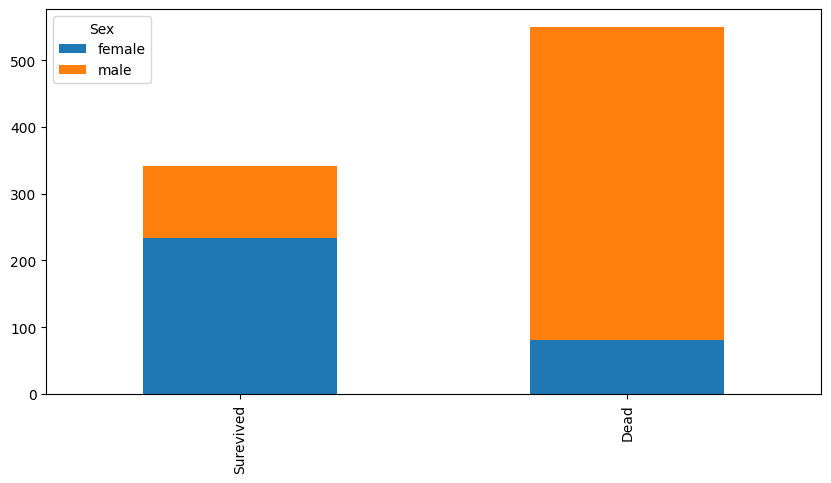

In [7]:
bar_chart('Sex')

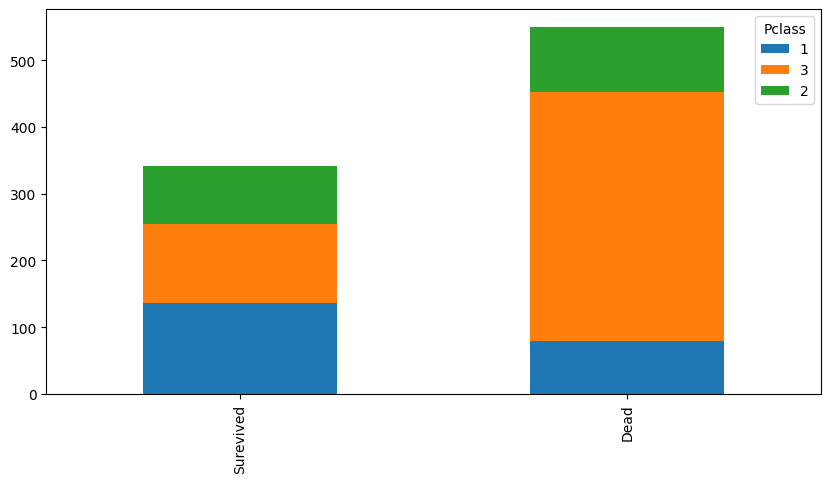

In [8]:
bar_chart('Pclass')

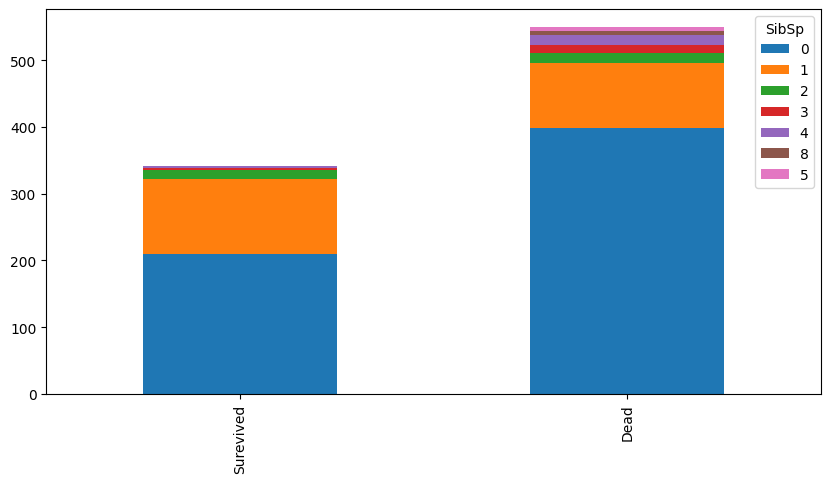

In [10]:
bar_chart('SibSp')

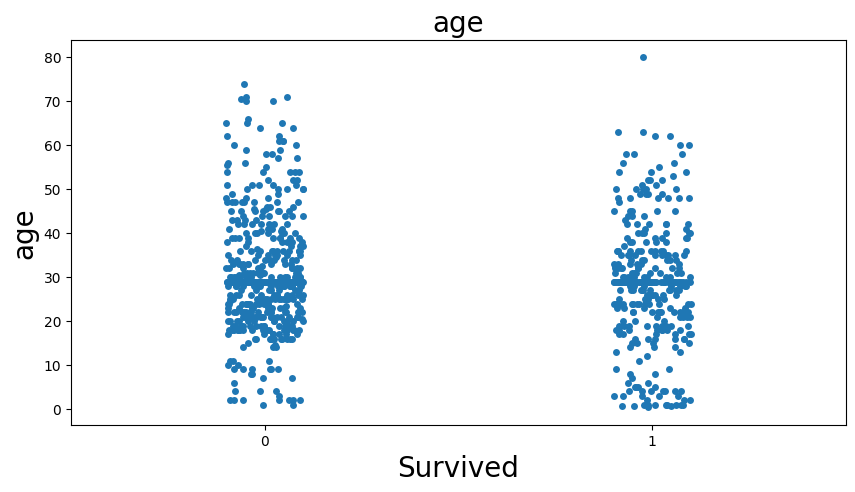

In [36]:
plt.figure(figsize = (10,5))
plt.title('age',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Age', data = train, jitter = True)
plt.xlabel('Survived', fontsize = 20)
plt.ylabel('age', fontsize = 20)


plt.show()

#0: 사망, 1: 생존

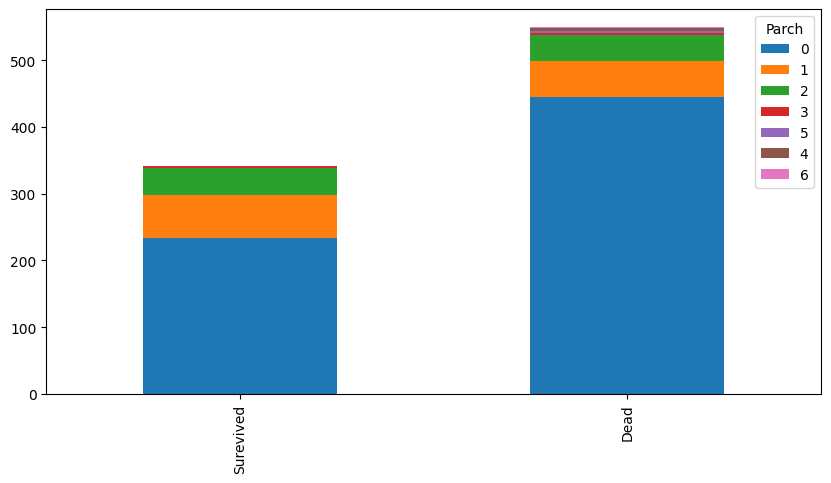

In [17]:
bar_chart('Parch')

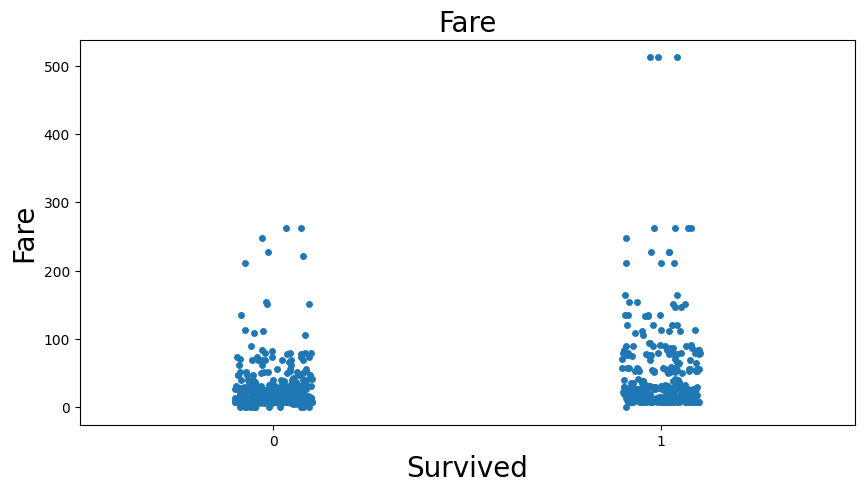

In [37]:
plt.figure(figsize = (10,5))
plt.title('Fare',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Fare', data = train, jitter = True)
plt.xlabel('Survived', fontsize = 20)
plt.ylabel('Fare', fontsize = 20)


plt.show()

#0: 사망, 1: 생존

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
train['Age'] = train['Age'].fillna(29) #최빈값
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})
train_x = train[['Pclass', 'SibSp','Age', 'Sex', 'Fare']]
train_y = train['Survived']

In [ ]:
fields = df.keys()
fields[1:4]
new_df=df[['Survived', 'Pclass', 'Name']]
print(new_df)

     Survived  Pclass                                               Name
0           0       3                            Braund, Mr. Owen Harris
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2           1       3                             Heikkinen, Miss. Laina
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4           0       3                           Allen, Mr. William Henry
..        ...     ...                                                ...
886         0       2                              Montvila, Rev. Juozas
887         1       1                       Graham, Miss. Margaret Edith
888         0       3           Johnston, Miss. Catherine Helen "Carrie"
889         1       1                              Behr, Mr. Karl Howell
890         0       3                                Dooley, Mr. Patrick

[891 rows x 3 columns]


In [ ]:
new_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
new_df.loc[1:3,['Survived', 'Pclass']]

,Survived,Pclass
1,1,1
2,1,3
3,1,1


In [ ]:
new_df.iloc[1:3,[1,2]]

,Pclass,Name
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"


In [ ]:
# x축 삭제 axis = 1 필드는 1
df.drop("sci",axis=1, inplace=True)

# y축 삭제 axis = 0 데이터는 0번


In [ ]:
# 예제 데이터프레임 생성
data = {
    "col": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "col1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "col2": ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
}
df = pd.DataFrame(data)


In [ ]:
df

,col,col1,col2
0,10,1,a
1,20,2,b
2,30,3,c
3,40,4,d
4,50,5,e
5,60,6,f
6,70,7,g
7,80,8,h
8,90,9,i
9,100,10,j


In [ ]:
# 브로드캐스팅 기능(하나의 값이 아닌 전체 값을 가져온다.)
boolean = df['col'] > 50
boolean

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: col, dtype: bool

In [ ]:
# True값만 출력***** 자주 쓰이는 중요한 기능
df[boolean]

,col,col1,col2
5,60,6,f
6,70,7,g
7,80,8,h
8,90,9,i
9,100,10,j


In [ ]:
# 데이터프레임 생성
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
        'Score': [85, 92, 78, 65, 88]}
df = pd.DataFrame(data)
df

,Name,Score
0,Alice,85
1,Bob,92
2,Charlie,78
3,David,65
4,Emily,88


In [ ]:
# 3항 연산자
import numpy as np
tf = df['Score'] # 브로드캐스팅 기능
df['grade'] = np.where(tf>=90,'A',
                       np.where(tf>=80,'B',
                                np.where(tf>=70,'C',
                                         np.where(tf>=60,'D','F'))))

In [ ]:
df

,Name,Score,grade
0,Alice,85,B
1,Bob,92,A
2,Charlie,78,C
3,David,65,D
4,Emily,88,B


In [ ]:
data = {
    'col': ['A', 'A', 'B', 'B', 'A'],
    'col1': [1, 2, 3, 4, 5],
    'col2': [10, 20, 30, 40, 50],
    'col3': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)
df

,col,col1,col2,col3
0,A,1,10,100
1,A,2,20,200
2,B,3,30,300
3,B,4,40,400
4,A,5,50,500


In [ ]:
# 'col'을 기준으로 그룹화
groups = df.groupby('col')

# 각 그룹에 대해 반복
for name, group in groups:
  print(name)
  print(group)

A
  col  col1  col2  col3
0   A     1    10   100
1   A     2    20   200
4   A     5    50   500
B
  col  col1  col2  col3
2   B     3    30   300
3   B     4    40   400


In [ ]:
groups.agg(['mean'])

,col1,col2,col3
,mean,mean,mean
col,,,
A,2.666667,26.666667,266.666667
B,3.500000,35.000000,350.000000


In [ ]:
# 메모리에서 삭제
del groups

In [ ]:
groups[['col1','col2']].agg(['max','min'])

col1     col2    
     max min  max min
col                  
A      5   1   50  10
B      4   3   40  30

In [ ]:
agg_format = {"col1": "max", "col2":"min", "col3":"mean"}
groups.agg(agg_format)

,col1,col2,col3
col,,,
A,5,10,266.666667
B,4,30,350.000000


In [ ]:
df3 = df.groupby("col").agg(
    max=("col1", "max"),
    min=("col2", "min"),
    mean=("col3", "mean")
)
df3

,max,min,mean
col,,,
A,5,10,266.666667
B,4,30,350.000000


In [ ]:
string = "Hello Pyhton"
string[0:4]
len(string)
string.upper() # 대문자
string.lower() # 소문자

'hello pyhton'

In [ ]:
a='I'
b='like'
c='Python'
string = a+' '+b+' '+c
string = f"{a} {b} {c}"
string

'I like Python'

In [ ]:
lists=[1,2,3,'a',"like",2.4]
lists.append("python") # 리스트의 끝에 추가
lists.remove('python') # 리스트의 해당 데이터 삭제
lists.insert(1,'python') # 리스트의 특정 위치에 추가
print(lists)
lists[0] # 1 출력

[1, 2, 3, 'a', 'like', 2.4]
[1, 'python', 2, 3, 'a', 'like', 2.4]


1

In [ ]:
# 홀수번째 값만 출력
for idx, item in enumerate(lists):
  if idx % 2 == 1:
    print(item)
for idx, letter in enumerate(string):
  if idx % 2 == 1:
    print(letter)

python
3
like
 
i
e
P
t
o


In [ ]:
# dicts - 딕셔너리구조
dicts = {'a':1, 'b':2, 'c':'python'} # a=1, b=2, c='python'
dicts['c'] # [key값] value값 출력
dicts.keys() # 모든 key값만 출력
dicts.values() # 모든 value값만 출력
dicts.items() # 튜플구조로 출력

dict_items([('a', 1), ('b', 2), ('c', 'python')])


In [ ]:
for key, value in dicts.items():
  if key == 'b':
    print(key, value)

b 2


In [ ]:
dicts['d'] = 'java'
dicts

{'a': 1, 'b': 2, 'c': 'python', 'd': 'java'}

In [ ]:
del dicts['a']
dicts

{'b': 2, 'c': 'python', 'd': 'java'}

In [ ]:
# 3단 출력(포랩구조로 출력)
for x in range(1,10): # 1~9까지
  for y in range(1,10): # 1~9까지
    print(f"{y} * {x} = {x * y}", end="\t")
  print()

1 * 1 = 1	2 * 1 = 2	3 * 1 = 3	4 * 1 = 4	5 * 1 = 5	6 * 1 = 6	7 * 1 = 7	8 * 1 = 8	9 * 1 = 9	
1 * 2 = 2	2 * 2 = 4	3 * 2 = 6	4 * 2 = 8	5 * 2 = 10	6 * 2 = 12	7 * 2 = 14	8 * 2 = 16	9 * 2 = 18	
1 * 3 = 3	2 * 3 = 6	3 * 3 = 9	4 * 3 = 12	5 * 3 = 15	6 * 3 = 18	7 * 3 = 21	8 * 3 = 24	9 * 3 = 27	
1 * 4 = 4	2 * 4 = 8	3 * 4 = 12	4 * 4 = 16	5 * 4 = 20	6 * 4 = 24	7 * 4 = 28	8 * 4 = 32	9 * 4 = 36	
1 * 5 = 5	2 * 5 = 10	3 * 5 = 15	4 * 5 = 20	5 * 5 = 25	6 * 5 = 30	7 * 5 = 35	8 * 5 = 40	9 * 5 = 45	
1 * 6 = 6	2 * 6 = 12	3 * 6 = 18	4 * 6 = 24	5 * 6 = 30	6 * 6 = 36	7 * 6 = 42	8 * 6 = 48	9 * 6 = 54	
1 * 7 = 7	2 * 7 = 14	3 * 7 = 21	4 * 7 = 28	5 * 7 = 35	6 * 7 = 42	7 * 7 = 49	8 * 7 = 56	9 * 7 = 63	
1 * 8 = 8	2 * 8 = 16	3 * 8 = 24	4 * 8 = 32	5 * 8 = 40	6 * 8 = 48	7 * 8 = 56	8 * 8 = 64	9 * 8 = 72	
1 * 9 = 9	2 * 9 = 18	3 * 9 = 27	4 * 9 = 36	5 * 9 = 45	6 * 9 = 54	7 * 9 = 63	8 * 9 = 72	9 * 9 = 81	


In [ ]:
a = float(input("첫번째 숫자를 입력하세요.")) # input은 무조건 string으로 받는다.
b = float(input("두번째 숫자를 입력하세요."))
print(a*b)

첫번째 숫자를 입력하세요.1
두번째 숫자를 입력하세요.2
2.0


In [ ]:
a = int(input())
b = int(input())
q = a // b
r = a % b
print(f"몫 : {q}, 나머지 : {r}")

5
2
몫 : 2, 나머지 : 1


In [ ]:
# 10. 30, ‘20’, “python”, 3.14의 데이터 타입을 출력
# 데이터 타입 출력
print(type(30))        # <class 'int'>
print(type('20'))      # <class 'str'>
print(type("python"))  # <class 'str'>
print(type(3.14))      # <class 'float'>

<class 'int'>
<class 'str'>
<class 'str'>
<class 'float'>


In [ ]:
# 11. 사용자로부터 2개의 숫자를 입력 받아서 큰 수를 출력
num1 = float(input("첫번째 숫자를 입력하세요."))
num2 = float(input("두번째 숫자를 입력하세요."))

max_num = max(num1, num2)
print(f"큰 수 : {max_num}")

첫번째 숫자를 입력하세요.23
두번째 숫자를 입력하세요.1
큰 수 : 23.0


In [ ]:
# 12. 사용자로부터 1개의 숫자를 입력 받아서 홀수인지 짝수인지 출력
x = int(input("숫자를 입력하세요."))
if x % 2 == 1:
  print("홀수")
else:
  print("짝수")

숫자를 입력하세요.3
홀수


In [ ]:
# 13. 사용자로부터 3개의 숫자를 입력 받아서 가장 작은 수를 출력
num1 = float(input("첫번째 숫자를 입력하세요."))
num2 = float(input("두번째 숫자를 입력하세요."))
num3 = float(input("세번째 숫자를 입력하세요."))
print(f"가장 작은 수 : {min(num1, num2, num3)}")

첫번째 숫자를 입력하세요.4
두번째 숫자를 입력하세요.3
세번째 숫자를 입력하세요.2
가장 작은 수 : 2.0


In [ ]:
# 14. 사용자로부터 1개의 숫자를 입력 받아서 학점을 출력
score = float(input("점수를 입력하세요."))
if score >= 90:
  grade = 'A'
elif score >= 80:
  grade = 'B'
elif score >= 70:
  grade = 'C'
elif score >= 60:
  grade = 'D'
else:
  grade = 'F'
print(f"점수 : {score}, 학점 : {grade}")



점수를 입력하세요.90
점수 : 90.0, 학점 : A


In [ ]:
# 15. 사용자로부터 출생년도를 입력 받아서 나이를 출력
import datetime
# 현재 연도 계산
current_year = datetime.datetime.now().year
birth_year = int(input("출생년도를 입력하세요."))
age = current_year - birth_year
print(f"당신의 나이는 {age}세 입니다.")

출생년도를 입력하세요.2021
당신의 나이는 3세 입니다.


In [ ]:
# 16. 사용자로부터 년도를 입력 받아서 2월의 마지막 날을 출력
import calendar
year = int(input("년도를 입력하세요."))
# 2월 마지막 날 계산
last_day_of_february = calendar.monthrange(year,2)[1]
print(f"{year}년 2월의 마지막 날은 {last_day_of_february}일입니다.")

년도를 입력하세요.2024
2024년 2월의 마지막 날은 29일입니다.


In [ ]:
# 17. “ 89\n”에서 89만 출력
s = " 89\n"
# 문자열의 앞뒤 공백과 줄바꿈 문자 제거
result = s.strip()
result

'89'

In [ ]:
# 18. “We are met on a great battlefield of that war. We have come to dedicate a portion
# of that field as a final resting-place for those who here gave their lives that that nation might live.
# It is altogether fitting and proper that we should do this.”에서 “We”라는 단어가 몇번 나오는지 출력

text = "We are met on a great battlefield of that war. We have come to dedicate a portion of that field as a final resting-place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this."
we_count = text.count("We")
we_count

2

In [ ]:
# 19. 위 문장에서 ‘t’가 몇번 나오는지 출력
text = ("We are met on a great battlefield of that war. We have come to dedicate a portion of that field as a final "
        "resting-place for those who here gave their lives that that nation might live. It is altogether fitting and "
        "proper that we should do this.")
t_count = text.count('t')
t_count

28

In [ ]:
# 20. “python”문자에서 두번째와 다섯번째 문자 출력
s= 'python'
second_char = s[1]
fifth_char = s[4]
print(f"두 번째 문자: {second_char}, 다섯 번째 문자: {fifth_char}")

두 번째 문자: y, 다섯 번째 문자: o


In [ ]:
# 21. 사용자로부터 영어 문자를 입력 받아서 “t”가 몇번 나오는지 출력
input_text = input("영어 문자열을 입력하시오.")
print(input_text.count('t'))

영어 문자열을 입력하시오.fkjnviotrettyyrt
4


In [ ]:
# 22. “java,javascript,python”를 각각의 언어가 3개로 된 문자열 리스트로 출력(문자열 분리 출력)
# 원본 문자열
languages = "java,javascript,python"
splited_list = languages.split(',')
splited_list

['java', 'javascript', 'python']

In [ ]:
# 23. "java,javascript,python"를 각각의 언어가 3개로 된 문자열 리스트로 출력한 후 다시 하나의 문자열로 출력
joined_list = ','.join(splited_list)
joined_list

'java,javascript,python'

In [ ]:
# 24. for문을 이용하여 1부터 10까지의 합을 구하시오
sum =0
for x in range(1,11):
  sum += x
sum

55

In [ ]:
# 25. 사용자로부터 숫자를 입력 받아서 그 숫자의 구구단을 출력
input_num = int(input('숫자를 입력하시오.'))
for x in range(1,10):
  print(f"{input_num} * {x} = {input_num*x}", end='\t')

숫자를 입력하시오.8
8 * 1 = 8	8 * 2 = 16	8 * 3 = 24	8 * 4 = 32	8 * 5 = 40	8 * 6 = 48	8 * 7 = 56	8 * 8 = 64	8 * 9 = 72	

In [ ]:
# 26. 1에서 30까지의 숫자에서 3의 배수를 리스트에 담고 출력
multiples_of_three = []
for i in range(1,31):
  if i % 3  == 0:
    multiples_of_three.append(i)
multiples_of_three

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]

In [ ]:
# 27. [0, -1, 1, -2, 2, -3, 3, -4, 4]에서 양수만 남기고 제거하시오
# 원본 리스트
numbers = [0, -1, 1, -2, 2, -3, 3, -4, 4]
# 양수만 남기고 필터링
positive_numbers = [num for num in numbers if num > 0]
# [표현식 for 항목 in 반복 가능한 객체 if 조건] - 리스트 컴프리헨션
positive_numbers

[1, 2, 3, 4]

In [ ]:
# 28. [0, 1, 2, 2, 3, 4, 3, 5]에서 중복을 제거하여 출력
# 원본 리스트
numbers = [0, 1, 2, 2, 3, 4, 3, 5]
# 중복 제거
unique_num = list(set(numbers))
unique_num

[0, 1, 2, 3, 4, 5]

In [ ]:
# 29. [2, 4, 3, 1, 5]에서 오름차순으로 정렬하시오
# 원본 리스트
numbers = [2, 4, 3, 1, 5]
numbers.sort() # 원본 변형
numbers

[1, 2, 3, 4, 5]

In [ ]:
# 30. 29번 문제에서 내림차순으로 정렬하시오
numbers.sort(reverse=True)
numbers

[5, 4, 3, 2, 1]

In [ ]:
# 31. ["A.csv", "B.txt", "C.csv", "D.json", "E.jpg"]에서 확장자가 .csv인 것만 출력
files = ["A.csv", "B.txt", "C.csv", "D.json", "E.jpg"]
csv_files = [file for file in files if file.endswith('.csv')]
csv_files

['A.csv', 'C.csv']

In [ ]:
# 32. {'국어': 95, '영어': 87, '수학': 89}에서 평균을 계산하여 딕션너리에 넣고 출력 <- 일단 보류
# 예시 scores 사전
scores = {'Alice': 85, 'Bob': 90, 'Charlie': 78}

# 변수 이름 변경: sum -> total_sum
total_sum = 10  # total_sum으로 변경

# 평균 계산
# 내장 함수 sum()을 사용합니다.
average_score = sum(scores.values()) / len(scores)

# 평균을 출력
print("Average Score:", average_score)

Average Score: 84.33333333333333


In [ ]:
# 33. 이중 for문으로 구구단을 출력하시오. 가로 단이 형성되게 하시오
# 구구단 출력(포랩구조로 출력)
for x in range(1,10): # 1~9까지
  for y in range(1,10): # 1~9까지
    print(f"{y} * {x} = {x * y}", end="\t")
  print()

1 * 1 = 1	2 * 1 = 2	3 * 1 = 3	4 * 1 = 4	5 * 1 = 5	6 * 1 = 6	7 * 1 = 7	8 * 1 = 8	9 * 1 = 9	
1 * 2 = 2	2 * 2 = 4	3 * 2 = 6	4 * 2 = 8	5 * 2 = 10	6 * 2 = 12	7 * 2 = 14	8 * 2 = 16	9 * 2 = 18	
1 * 3 = 3	2 * 3 = 6	3 * 3 = 9	4 * 3 = 12	5 * 3 = 15	6 * 3 = 18	7 * 3 = 21	8 * 3 = 24	9 * 3 = 27	
1 * 4 = 4	2 * 4 = 8	3 * 4 = 12	4 * 4 = 16	5 * 4 = 20	6 * 4 = 24	7 * 4 = 28	8 * 4 = 32	9 * 4 = 36	
1 * 5 = 5	2 * 5 = 10	3 * 5 = 15	4 * 5 = 20	5 * 5 = 25	6 * 5 = 30	7 * 5 = 35	8 * 5 = 40	9 * 5 = 45	
1 * 6 = 6	2 * 6 = 12	3 * 6 = 18	4 * 6 = 24	5 * 6 = 30	6 * 6 = 36	7 * 6 = 42	8 * 6 = 48	9 * 6 = 54	
1 * 7 = 7	2 * 7 = 14	3 * 7 = 21	4 * 7 = 28	5 * 7 = 35	6 * 7 = 42	7 * 7 = 49	8 * 7 = 56	9 * 7 = 63	
1 * 8 = 8	2 * 8 = 16	3 * 8 = 24	4 * 8 = 32	5 * 8 = 40	6 * 8 = 48	7 * 8 = 56	8 * 8 = 64	9 * 8 = 72	
1 * 9 = 9	2 * 9 = 18	3 * 9 = 27	4 * 9 = 36	5 * 9 = 45	6 * 9 = 54	7 * 9 = 63	8 * 9 = 72	9 * 9 = 81	


In [ ]:
# 34. 다음과 같은 테이블을 딕션너리 자료구조로 표현해 보시오.
people = [
    {"이름":"홍길동","나이":30, "직업":"의사"},
    {"이름":"김철수","나이":25, "직업":"엔지니어"},
    {"이름":"이영희","나이":28, "직업":"선생님"}
]
for person in people:
  print(person)

{'이름': '홍길동', '나이': 30, '직업': '의사'}
{'이름': '김철수', '나이': 25, '직업': '엔지니어'}
{'이름': '이영희', '나이': 28, '직업': '선생님'}


In [ ]:
# 35. 테이블 딕셔너리에서 key값과 value값 그리고 key, value로 된 리스트 각각 출력
# key값 출력
keys_list = [list(person.keys()) for person in people]
print("Keys:", keys_list)
# value 값 출력
values_list = [list(person.values()) for person in people]
print("Values:", values_list)
# key, value로 된 리스트 출력
items_list = [list(person.items()) for person in people]
print("Items:", items_list)


Keys: [['이름', '나이', '직업'], ['이름', '나이', '직업'], ['이름', '나이', '직업']]
Values: [['홍길동', 30, '의사'], ['김철수', 25, '엔지니어'], ['이영희', 28, '선생님']]
Items: [[('이름', '홍길동'), ('나이', 30), ('직업', '의사')], [('이름', '김철수'), ('나이', 25), ('직업', '엔지니어')], [('이름', '이영희'), ('나이', 28), ('직업', '선생님')]]


In [ ]:
# 36. 4칙연산과 몫과 나머지를 구하는 함수로 만들어서 출력
def arithmetic_operations(a,b):
  return a+b, a-b, a*b, round(a/b,2), a//b, a%b
# 두 숫자
num1, num2 = 10, 3

# 사칙연산과 몫, 나머지 계산
addition, subtraction, multiplication, division, quotient, remainder = arithmetic_operations(num1, num2)

# 결과 출력
print(f"덧셈: {addition}, 뺄셈: {subtraction}, 곱셈: {multiplication}, 나눗셈: {division}, 몫: {quotient}, 나머지: {remainder}")




덧셈: 13, 뺄셈: 7, 곱셈: 30, 나눗셈: 3.33, 몫: 3, 나머지: 1


In [ ]:
# 37. 최대공약수와 최소공배수를 출력하는 함수 만들어 보시오
# 두 숫자
import math
num1, num2 = 48, 18
nums_gcd = math.gcd(num1,num2)
nums_lcm = num1*num2 // nums_gcd
print(f"최대공약수: {nums_gcd}, 최소공배수: {nums_lcm}")


최대공약수: 6, 최소공배수: 144


In [ ]:
# 38. 10진수와 변환할 진법을 사용자로부터 입력 받아서 그 진법에 해당하는 숫자를 출력하시오
decimal_number = int(input("10진수를 입력하세요: "))
base = int(input("변환할 진법을 입력하세요: "))
def convert_to_base(n,base): # n:10진수 값, base:진법
  if n == 0: # 입력받은 숫자 0일 경우
    return '0'
  digits = [] # 변환 결과 담을 배열
  while n: # n이 0이 아닐때까지
    digits.append(int(n%base)) # 해당 진수로 나눈 나머지 digits에 저장
    n //= base # 해당 진수로 나눈 몫을 n에 저장
  digits.reverse() # 역순 정렬
  return ''.join(map(str, digits))
converted_number = convert_to_base(decimal_number, base)
print(f"{decimal_number}을(를) {base}진법으로 변환한 결과: {converted_number}")

10진수를 입력하세요: 50
변환할 진법을 입력하세요: 2
50을(를) 2진법으로 변환한 결과: 110010


In [ ]:
2# 39. 10진수를 사용자로부터 받아서 각 자리 숫자를 리스트에 담아서 출력하시오
# 사용자로부터 10진수 숫자 입력받음
decimal_number = int(input("10진수를 입력하세요: "))
# 각 자리 숫자를 리스트에 담기
digits_list = [int(digit) for digit in str(decimal_number)]
digits_list

10진수를 입력하세요: 50


[5, 0]